# Regression Example: Predict the Price of a House
Here we will use some housing data to predict the price of a house based on a number of data points.
The data contains a lot of issues we will need to solve before we can get a result:

* String values (all features need to be numbers so we can do math on them)
* null values
* NaN values
* enumerable values (e.g. Sale Condition = ["Normal", "Abnormal", "Partial",...])
* Some of the data points may not be relevant to the sale price
* Some data points might be best combined into a single data point (added or multiplied)

We won't have time to address all of the issues, but let's explore some of them by importing the data and using dataframes and matplotlib to visualize it.

In [23]:
# Import the common packages for exploring Machine Learning
%matplotlib notebook
import numpy as np  # <-- common convention for short names of packages...
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Load housing data into DataFrame (Pandas reads & writes CSVs and many other data formats)
# data source: linked from https://ww2.amstat.org/publications/jse/v19n3/decock.pdf 

# Download this file to our Jupyter filesystem
!wget http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt;
# file is 'Tab Separated' with a generic extension, so tell Pandas which separator to use:  \t
df = pd.read_csv('AmesHousing.txt',sep='\t');

--2018-05-09 19:47:43--  http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
Resolving www.amstat.org (www.amstat.org)... 50.205.225.65
Connecting to www.amstat.org (www.amstat.org)|50.205.225.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt [following]
--2018-05-09 19:47:43--  https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
Resolving ww2.amstat.org (ww2.amstat.org)... 50.205.225.74
Connecting to ww2.amstat.org (ww2.amstat.org)|50.205.225.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963738 (941K) [text/plain]
Saving to: ‘AmesHousing.txt.1’

AmesHousing.txt.1   100%[===================>] 941.15K   941KB/s    in 1.0s    

2018-05-09 19:47:45 (941 KB/s) - ‘AmesHousing.txt.1’ saved [963738/963738]



In [25]:
# DataFrames in Pandas are easy to sample or use head(n) or tail(n)

# df.head(3)
# df.tail(3)
df.sample(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
424,425,528106070,20,RL,108.0,13173,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,325000
783,784,905377010,20,RL,NaN,17140,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,135000
1970,1971,535477130,60,RL,69.0,7590,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,169500
1776,1777,528427100,20,RL,91.0,11830,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,260261
1120,1121,528458030,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2008,New,Partial,212700
1732,1733,528221040,60,RL,63.0,9729,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,198444
1690,1691,528106040,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,415298
1523,1524,909251080,70,RL,66.0,8969,Pave,NaN,Reg,Bnk,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,145000
1378,1379,905103030,80,RL,80.0,13014,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,157500
1091,1092,528253020,120,RL,55.0,7301,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,217300


In [26]:
# Wow, 82 is lots of columns - let's sort them so we can find what we're looking for more easily
df.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Kitchen AbvGr',
       'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config',
       'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass',
       'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature', 'Misc Val',
       'Mo Sold', 'Neighborhood', 'Open Porch S

In [27]:
# Maybe we want to grab just a subset of data columns - it's easy with Pandas. 
# Don't forget the double [[]] syntax for multiple selections

# let's start with the easy stuff and grab only the numeric columns
df2 = df[['SalePrice','Lot Area','Bedroom AbvGr','Year Built','Yr Sold','1st Flr SF', '2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2']]
df2.head(3)

,SalePrice,Lot Area,Bedroom AbvGr,Year Built,Yr Sold,1st Flr SF,2nd Flr SF,BsmtFin SF 1,BsmtFin SF 2
0,215000,31770,3,1960,2010,1656,0,639.0,0.0
1,105000,11622,2,1961,2010,896,0,468.0,144.0
2,172000,14267,3,1958,2010,1329,0,923.0,0.0


In [28]:
# Maybe you want to use Pandas Dataframes to engineer a new aggregate feature column
# It's easy to do opeations across columns (eg. add all the Square Footage columns into a new one 'Total SF')
df3 = pd.DataFrame(df2['1st Flr SF']+df2['2nd Flr SF']+df2['BsmtFin SF 1']+df2['BsmtFin SF 2'], columns=['Total SF'])
df3.head(5)

,Total SF
0,2295.0
1,1508.0
2,2252.0
3,3175.0
4,2420.0


In [29]:
# Combining DataFrame's is easy to
# use 'axis=1' for adding columns (features); 'axis=0' for more rows (examples)
df4 = pd.concat([df2,df3],axis=1) 
df4.sample(3) # <-- now we have a new 'Total SF' feature column appended

,SalePrice,Lot Area,Bedroom AbvGr,Year Built,Yr Sold,1st Flr SF,2nd Flr SF,BsmtFin SF 1,BsmtFin SF 2,Total SF
1743,226500,3621,2,2003,2007,1589,0,1084.0,0.0,2673.0
1914,144000,11344,3,1958,2007,874,650,460.0,0.0,1984.0
866,313000,11050,3,2000,2009,1476,677,904.0,0.0,3057.0


## Let's Try a Simple Linear Regression

In [30]:
# Let's see if we can predict a Sale Price based on single feature 'Gross Living Area'
# Create a new DataFrame with only the data we need
data = df[['SalePrice','Gr Liv Area']]
data.head(5)

,SalePrice,Gr Liv Area
0,215000,1656
1,105000,896
2,172000,1329
3,244000,2110
4,189900,1629


In [31]:
# sklearn complains if these are shape [100,] vs [100,1]
# just one of the many gotchas you'll find :)
X = data['Gr Liv Area'].values.reshape(-1,1) 
# Y is typically used for the Truth Labels
Y = data['SalePrice'].values.reshape(-1,1)

<IPython.core.display.Javascript object>


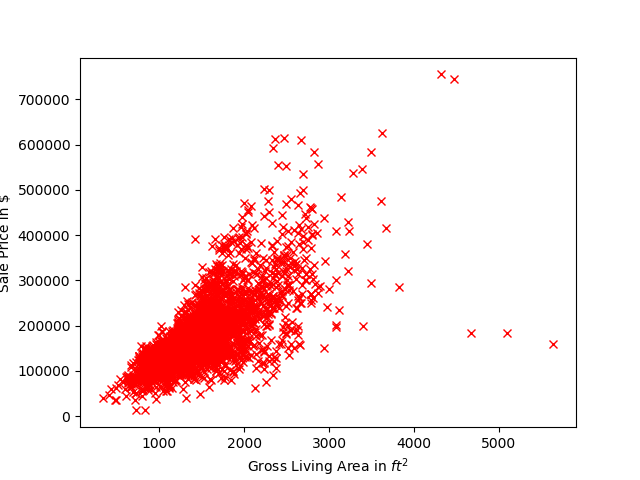

In [32]:
%matplotlib notebook
# Let's plot Square Foot vs Sale Price to understand our data
plt.xlabel('Gross Living Area in $ft^2$')
plt.ylabel('Sale Price in $')
plt.plot(X,Y,'rx');

## Let's Split the Data so We Can Evaluate How We'll We Can Predict

In [33]:
# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
# By default, train_test_split will split the data into 75%/25% train/test
housing_X_train, housing_X_test, housing_Y_train, housing_Y_test = train_test_split(
    X,Y,
    random_state=3
)
print('housing_X_train',len(housing_X_train),'examples')
print('housing_X_test',len(housing_X_test),'examples')
print('housing_Y_train',len(housing_Y_train),'examples')
print('housing_Y_test',len(housing_Y_test),'examples')

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)
# regr = linear_model.SGDRegressor(n_iter=100)

housing_X_train 2197 examples
housing_X_test 733 examples
housing_Y_train 2197 examples
housing_Y_test 733 examples


In [34]:
# The fit function will train the model using the training set
regr.fit(housing_X_train, housing_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [35]:
# Make predictions using the testing set
housing_Y_pred = regr.predict(housing_X_test)

# The coefficients
# print('Coefficients: \n', regr.coef_)
# TODO: this number is huge...
print("Mean squared error: %.2f" % mean_squared_error(housing_Y_test, housing_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(housing_Y_test, housing_Y_pred))

Mean squared error: 2942072587.24
Variance score: 0.51


<IPython.core.display.Javascript object>


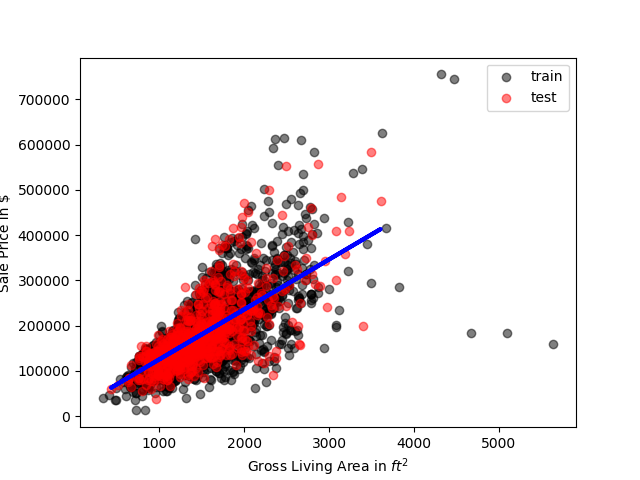

In [36]:
%matplotlib notebook
# Plot outputs
plt.scatter(housing_X_train, housing_Y_train, alpha=.5, color='black', label='train')
plt.scatter(housing_X_test, housing_Y_test, alpha=.5, color='red', label='test')
plt.plot(housing_X_test, housing_Y_pred,color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.legend()
plt.xlabel('Gross Living Area in $ft^2$')
plt.ylabel('Sale Price in $')

plt.show();

This looks OK, but how well did we really do?

Let's create a histogram showing how off we were from the truth.

If our model is good, we'll have a lot of hits in the middle and a nice tall bell curve. 

<IPython.core.display.Javascript object>


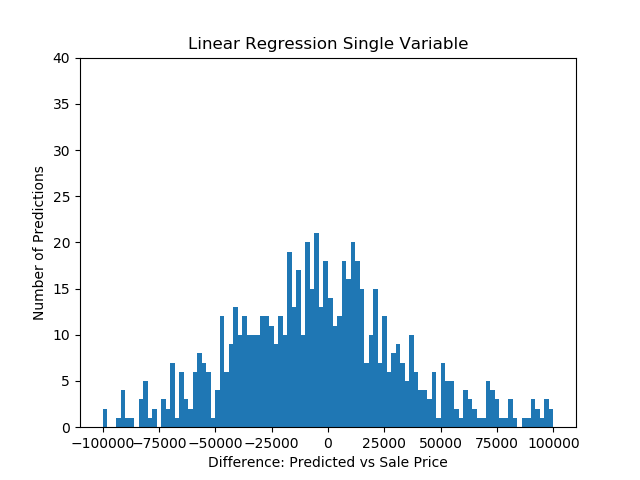

In [37]:
%matplotlib notebook

# Plot hist of predictions vs actual
y_lr = np.reshape(housing_Y_test,housing_Y_test.shape[0])
yhat_lr = np.reshape(housing_Y_pred,housing_Y_pred.shape[0])
ydiff_lr = np.subtract(y_lr,yhat_lr)

plt.ylim([0,40])
plt.hist(ydiff_lr,bins=100,range=[-100000, 100000])
plt.title('Linear Regression Single Variable')
plt.xlabel('Difference: Predicted vs Sale Price')
plt.ylabel('Number of Predictions')

plt.show();

This doesn't look that great.

We can do better if we consider multiple features of data and use a more complex model.

## Adding a Neural Network

For simplicity, let's start with just using all of the numerical columns in the data.
We aren't going to worry about featurizing non-numeric fields yet since there is probably useful data already in the dataset that won't require a lot of work to setup.

There are a lot of neural networks and tools to choose from. In this example, we are going to use an [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), built into scikit-learn

['Gr Liv Area', '1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Enclosed Porch', 'Fireplaces', 'Full Bath', 'Garage Area', 'Garage Cars', 'Garage Yr Blt', 'Half Bath', 'Kitchen AbvGr', 'Lot Area', 'Lot Frontage', 'Low Qual Fin SF', 'Mas Vnr Area', 'Mo Sold', 'Open Porch SF', 'Pool Area', 'TotRms AbvGrd', 'Total Bsmt SF', 'Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']
(2930, 31)
(2930, 1)
housing_X_train 2197 examples
housing_X_test 733 examples

Linear Regression (Single variable) VARIANCE: 0.51
NN MLP Regression (Multi variable) VARIANCE: 0.69 35% (1.35x) over 1 variable linear regression


<IPython.core.display.Javascript object>


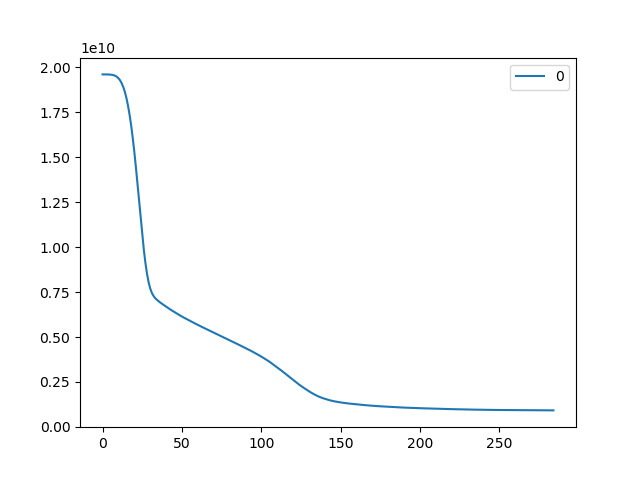

In [38]:
# sklearn.neural_network.MLPRegressor
# sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, 
# batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
# random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
# early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
from sklearn.neural_network import MLPRegressor

# Use all numerical columns to predict 'SalePrice'
columns = list([
    'Gr Liv Area', # this is our single linear regression point of reference
    # can we do better by adding these other features?
    '1st Flr SF', 
    '2nd Flr SF', 
    '3Ssn Porch', 
    'Bedroom AbvGr',
    'Bsmt Full Bath',
    'Bsmt Half Bath', 
    'Bsmt Unf SF', 
    'BsmtFin SF 1',
    'BsmtFin SF 2',
    'Enclosed Porch',
    'Fireplaces',
    'Full Bath',
    'Garage Area', 
    'Garage Cars',
    'Garage Yr Blt', 
    'Half Bath', 
    'Kitchen AbvGr',
    'Lot Area',
    'Lot Frontage', 
    'Low Qual Fin SF',
    'Mas Vnr Area',
    'Mo Sold', 
    'Open Porch SF',
    'Pool Area',
    'TotRms AbvGrd', 
    'Total Bsmt SF',
    'Wood Deck SF', 
    'Year Built', 
    'Year Remod/Add', 
    'Yr Sold'
])
print(columns)
# Create new dataframe with columns
X_NN = df[columns]
print(X_NN.shape)
#sklearn complains if these are shape [100,] vs [100,1]
Y_NN = df['SalePrice'].values.reshape(-1,1)
print(Y_NN.shape)
# remove NaN values & replace with 0's
X_NN = X_NN.fillna(0)
X_NN = X_NN.values # convert to plain NumPy array

# TODO: scaling & centering data
# scale & center our data
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_NN);

# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
housing_X_train_nn, housing_X_test_nn, housing_Y_train_nn, housing_Y_test_nn = train_test_split(
    X_scaled,Y_NN,
    random_state=2# what if we lock down the random seed number? (set to 1, 3, 10, etc)
)
print('housing_X_train',len(housing_X_train_nn),'examples')
print('housing_X_test',len(housing_X_test_nn),'examples')

score1 = r2_score(housing_Y_test, housing_Y_pred)
print('\nLinear Regression (Single variable) VARIANCE:',round(score1,2))


# you can run this multiple times to check the variable starting points
# each run will be different--and may be significantly difference since the initialization variables will change
# and that will affect how the model converges
# for i in range(2,8): # try setting one of the variables to i
# Explore settings logarithmically (0.1, 0.01, 0.001, 0.00001)
nn_regr = MLPRegressor(
    # what if we change our layer sizes?
    hidden_layer_sizes=(2,8,2), 
    # what if we change our learning rate?
    learning_rate_init=0.01,
    # what if we change our activation function? (relu, tanh, identity)
    activation='relu',
    max_iter=2000,
    random_state=2, # if set to None, this is random, to an int, static seed
    # set this to True to see how well we are learning over the iterations
    verbose=False
);

# Train it
nn_regr.fit(housing_X_train_nn,housing_Y_train_nn.reshape(housing_Y_train_nn.size))

# Make predictions using the testing set
housing_Y_pred_nn = nn_regr.predict(housing_X_test_nn)

# Variance scores or Linear Regression vs NN
score2 = r2_score(housing_Y_test_nn, housing_Y_pred_nn)

#print("Mean squared error: %.2f" % mean_squared_error(housing_Y_test_nn, housing_Y_pred_nn))
# Explained variance score: 1 is perfect prediction
answer = ((score2-score1)/score1)*100
print(
    'NN MLP Regression (Multi variable) VARIANCE: {} {:0.0f}% ({:0.2f}x) over 1 variable linear regression'.format(
        round(score2,2), answer, score2/score1
    )
)


pd.DataFrame(nn_regr.loss_curve_).plot()

## So How is That Bell Curve?

<IPython.core.display.Javascript object>


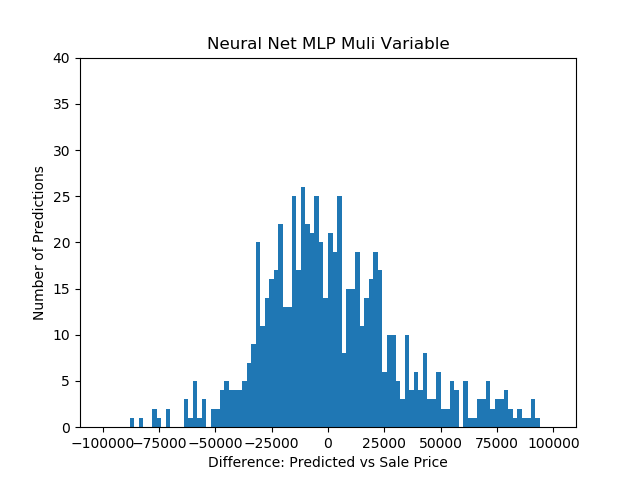

In [39]:
%matplotlib notebook

# Plot histogram of difference between predicted & actual sale price outputs
y_nn = np.reshape(housing_Y_test_nn,housing_Y_test_nn.shape[0])
yhat_nn = np.reshape(housing_Y_pred_nn,housing_Y_pred_nn.shape[0])
ydiff = np.subtract(y_nn,yhat_nn)

plt.ylim([0,40])
plt.hist(ydiff,bins=100,range=[-100000, 100000])

plt.title('Neural Net MLP Muli Variable')
plt.xlabel('Difference: Predicted vs Sale Price')
plt.ylabel('Number of Predictions')

plt.show();

That's significantly better!

But can we do even better?

## Let's Visualize The Relationship Each Feature Has With Price

We can plot a chart of each feature mapped to the sales price to easily see how a feature corresponds to the rising price.

If a feature doesn't show a correlation with increased price, this is not likely a good feature for our model to consider--and we can omit it from the data.

31


<IPython.core.display.Javascript object>


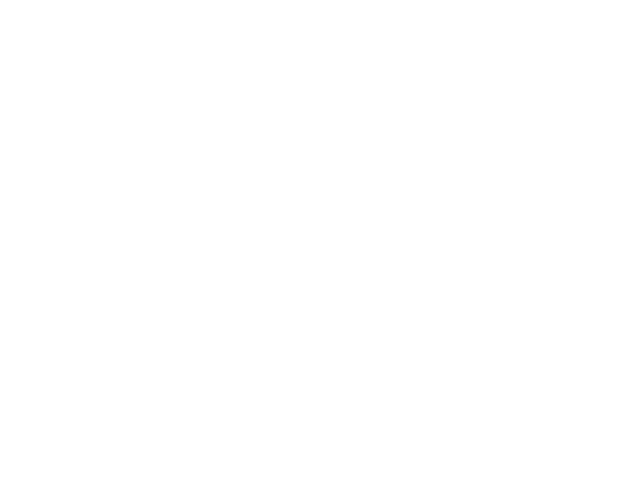

<IPython.core.display.Javascript object>


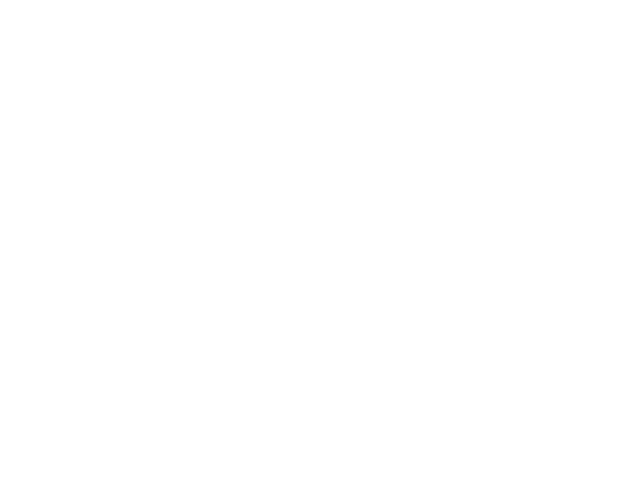

IndexError: index 1 is out of bounds for axis 1 with size 1

In [97]:
# Notes:
# Data not strongly correllate
# remove 'Bsmt Unf SF',
# adjust 'Garage Yr Blt' - notice poor logic of replacing NA values with 0 - created outliers/data scaling issue
# watch out for scaling - Lot Area
%matplotlib notebook
# How many columns do we have?
print(len(columns))

# for each feature, show how it relates to sales price
for i in range(0,len(columns)):
    # by specifying a figure, the plotter will create multiple figures
    plt.figure(i)
    #plt.scatter(X_NN[:,i], Y, alpha=.2, color='blue', label='train samples')
#     plt.scatter(housing_X_train[:,i], housing_Y_train, alpha=.3, color='black', label='train samples')
#     plt.scatter(housing_X_test[:,i], housing_Y_test, alpha=.3, color='red', label='test samples')
#     plt.scatter(housing_X_test[:,i], housing_Y_pred_nn,color='magenta', linewidth=1, alpha=.5, label='predictions')

    plt.xticks()
    plt.yticks()
    plt.legend()
    plt.xlabel(columns[i])
    plt.ylabel('Sale Price in $')

    plt.show();

## Which Features Are Useful?
## Which Features Are Not?
Let's remove all of the features that seem less useful and run it again...

Just go up to the cell that has our feature columns and comment out (command+/) any fields you want to remove.

What's the best score you can get?

<IPython.core.display.Javascript object>


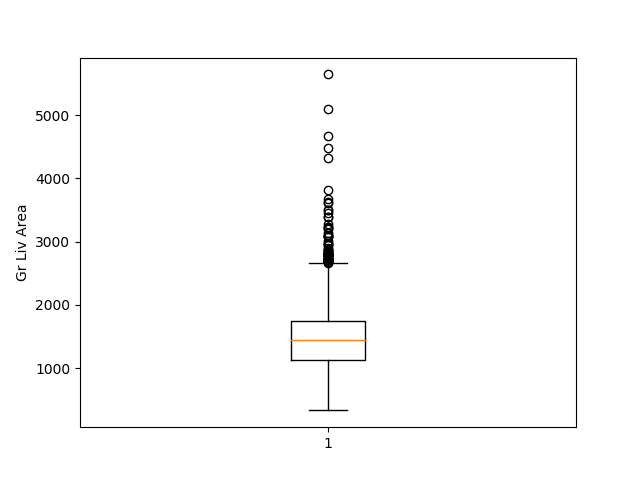

<IPython.core.display.Javascript object>


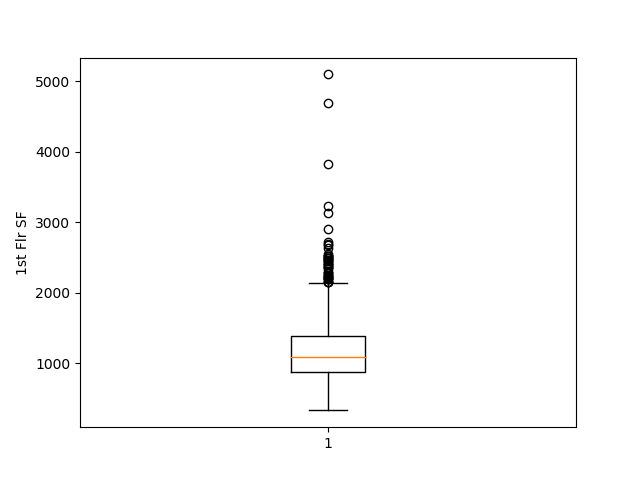

<IPython.core.display.Javascript object>


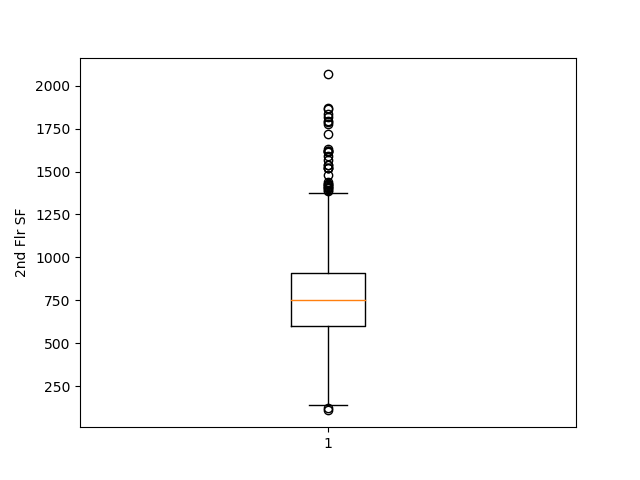

<IPython.core.display.Javascript object>


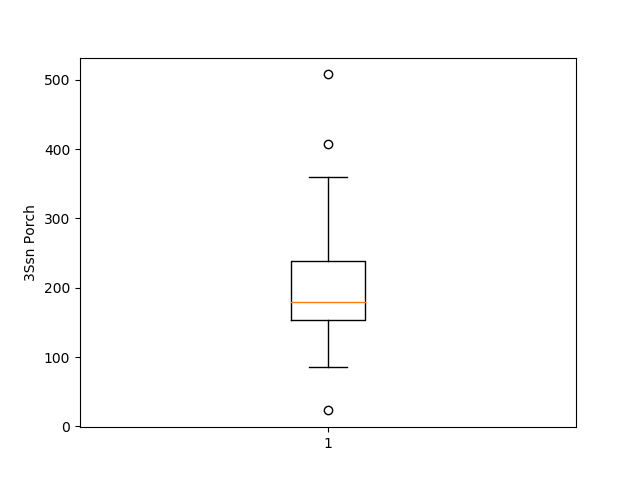

<IPython.core.display.Javascript object>


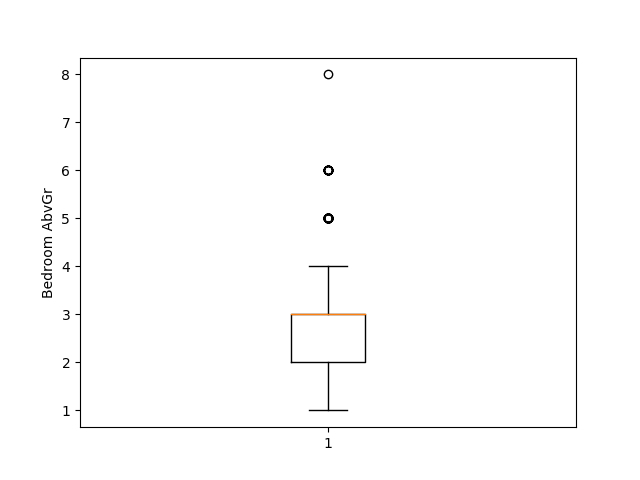

<IPython.core.display.Javascript object>


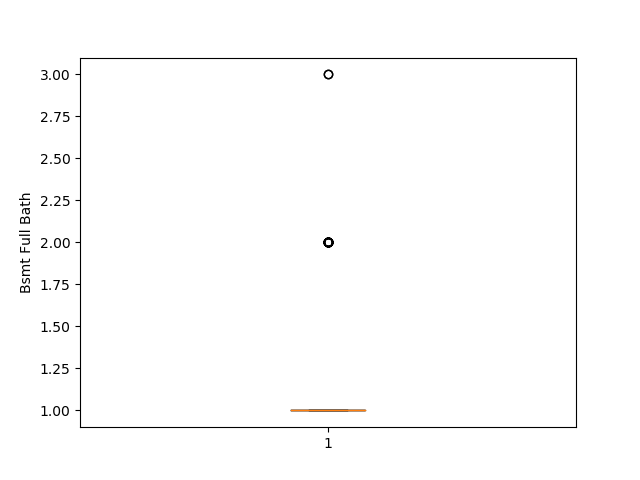

<IPython.core.display.Javascript object>


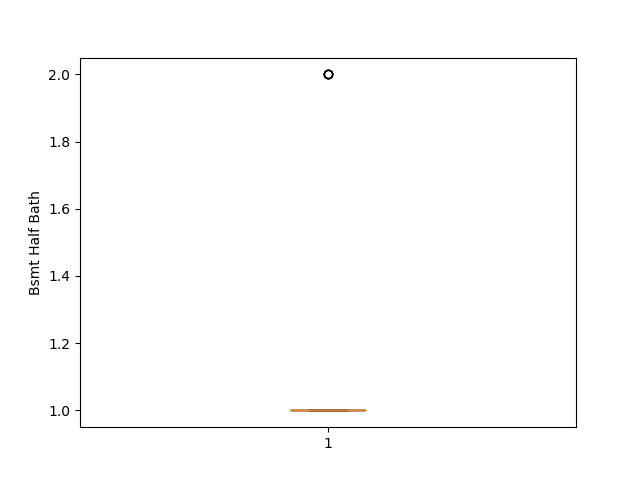

<IPython.core.display.Javascript object>


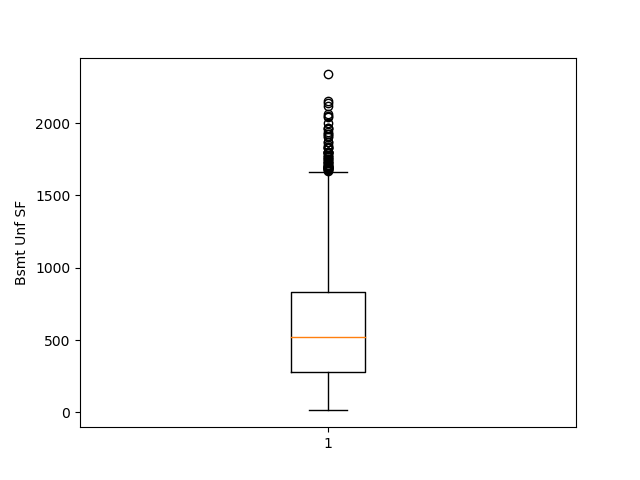

<IPython.core.display.Javascript object>


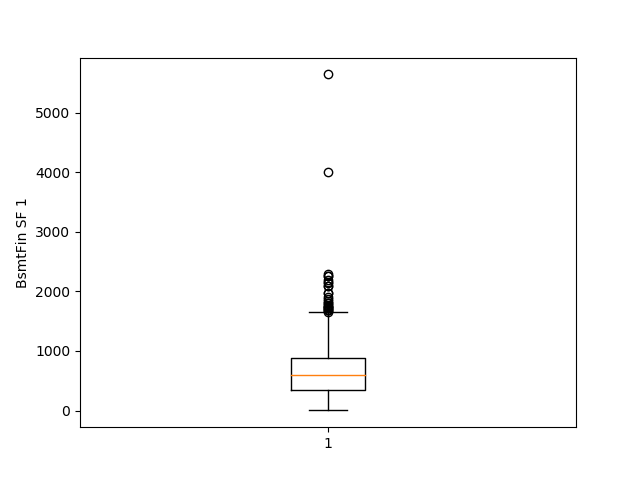

<IPython.core.display.Javascript object>


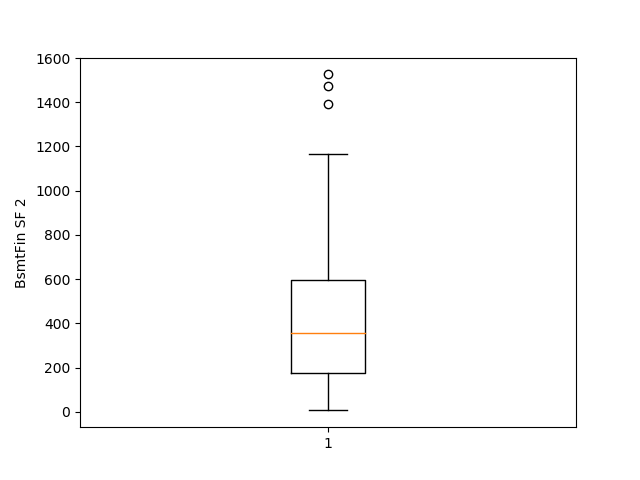

<IPython.core.display.Javascript object>


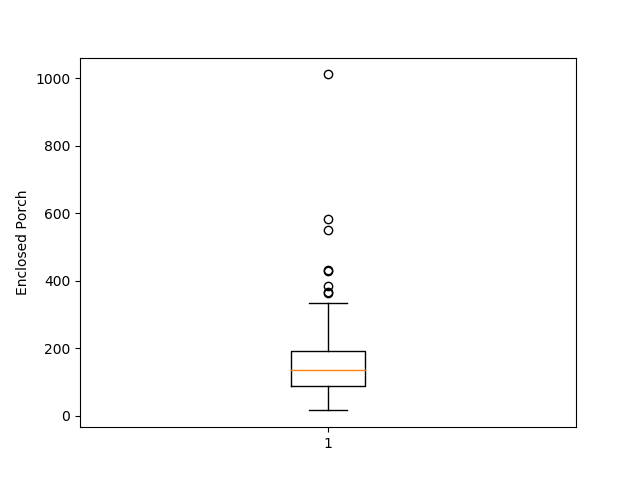

<IPython.core.display.Javascript object>


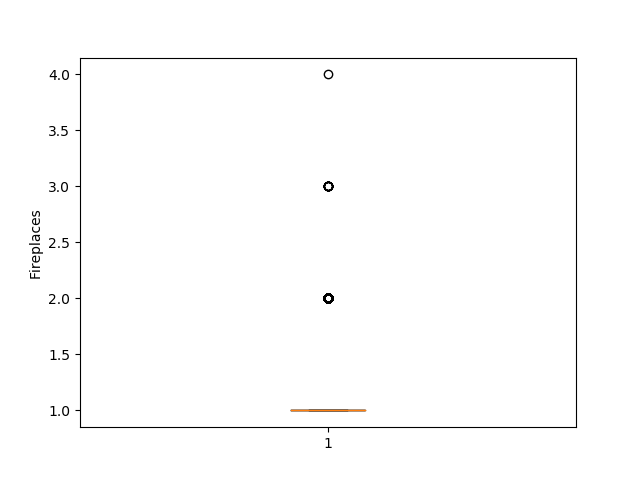

<IPython.core.display.Javascript object>


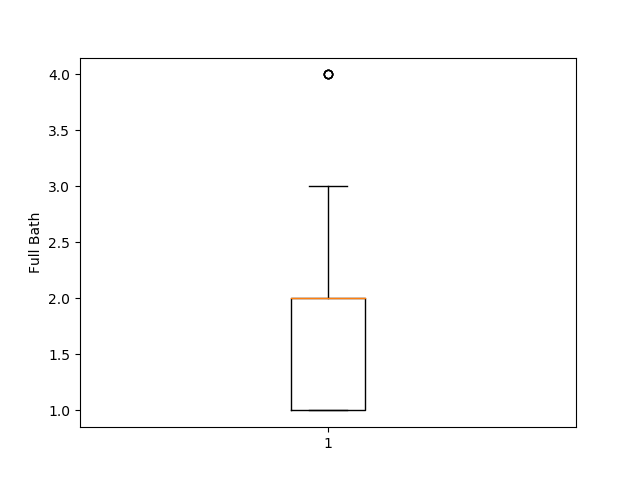

<IPython.core.display.Javascript object>


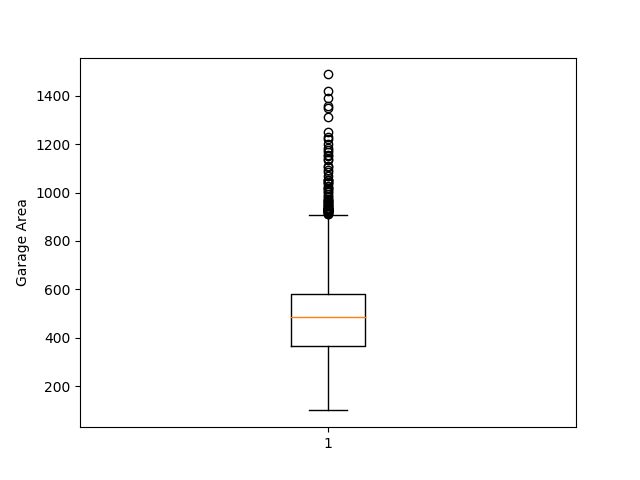

<IPython.core.display.Javascript object>


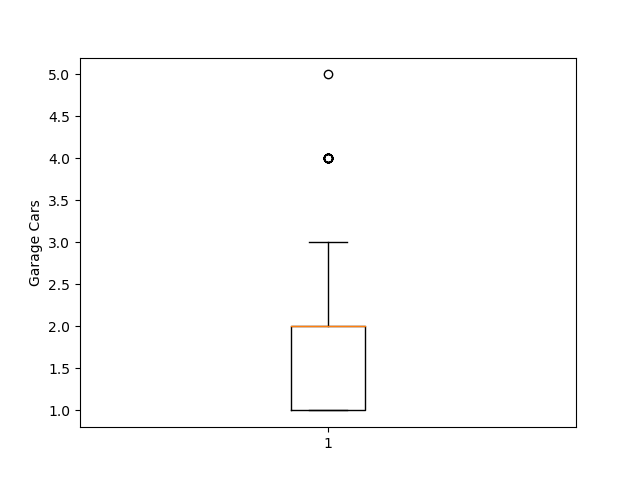

<IPython.core.display.Javascript object>


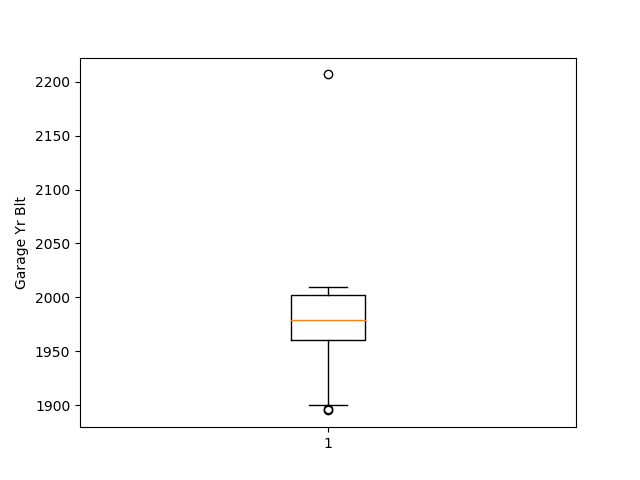

<IPython.core.display.Javascript object>


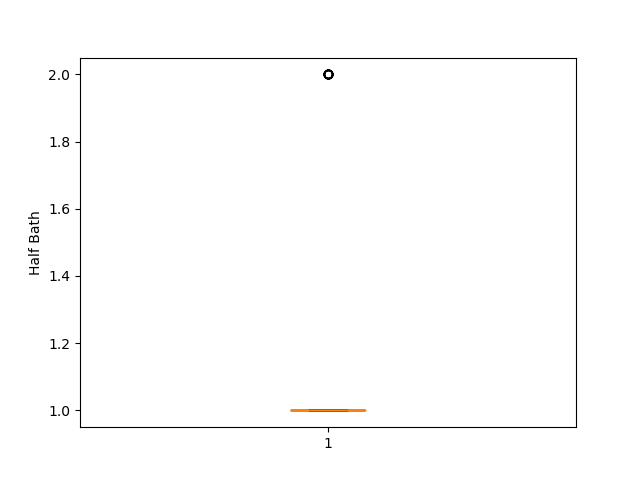

<IPython.core.display.Javascript object>


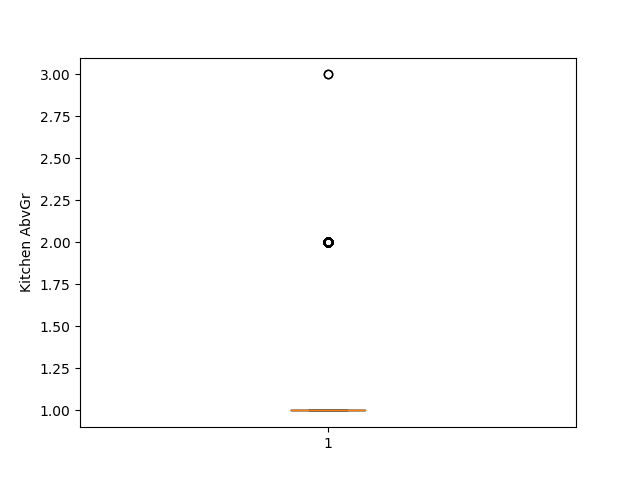

<IPython.core.display.Javascript object>


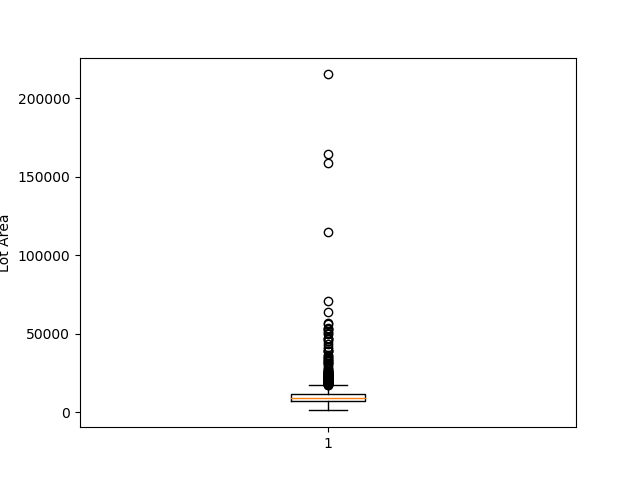

<IPython.core.display.Javascript object>


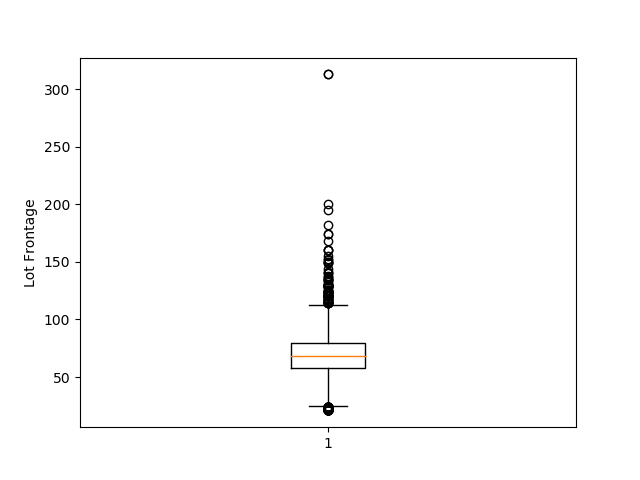

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


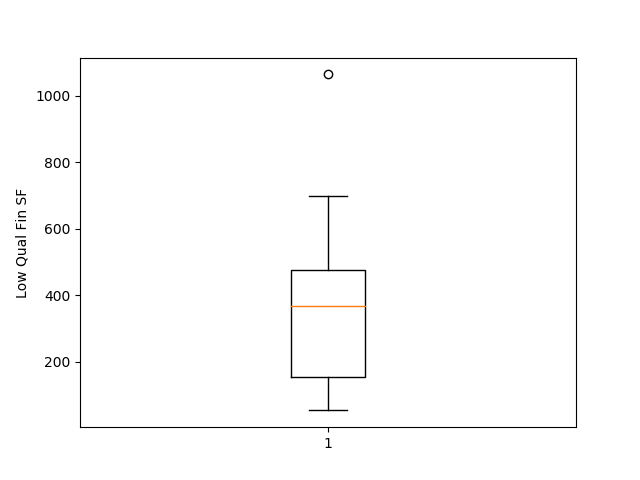

<IPython.core.display.Javascript object>


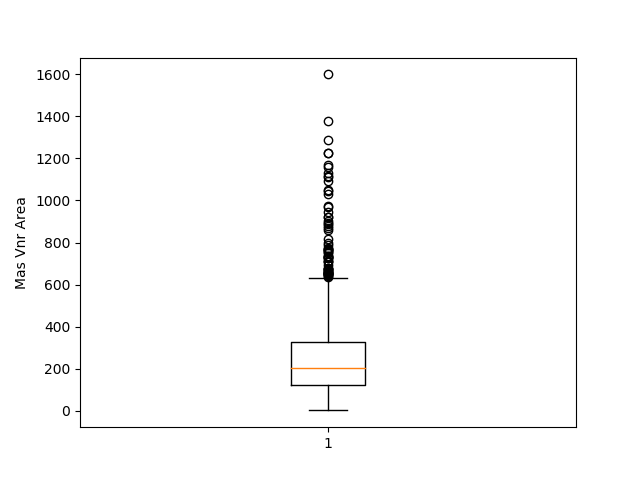

<IPython.core.display.Javascript object>


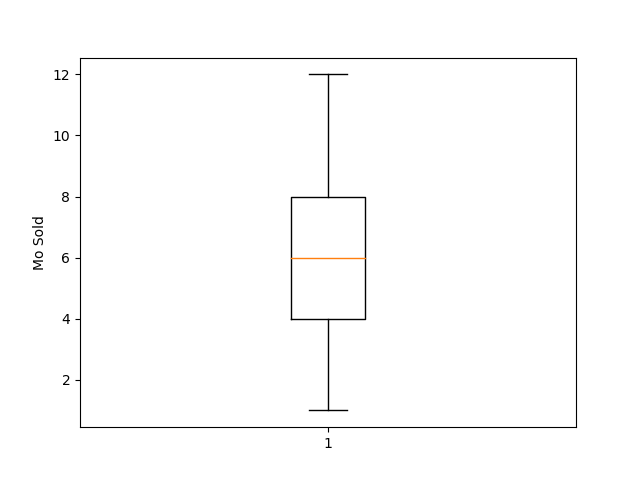

<IPython.core.display.Javascript object>


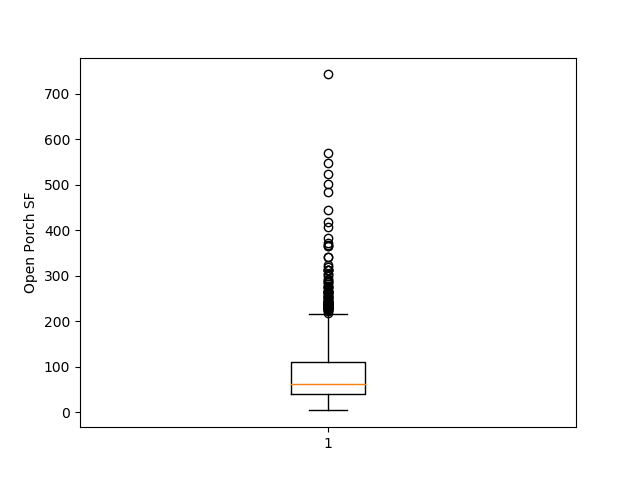

<IPython.core.display.Javascript object>


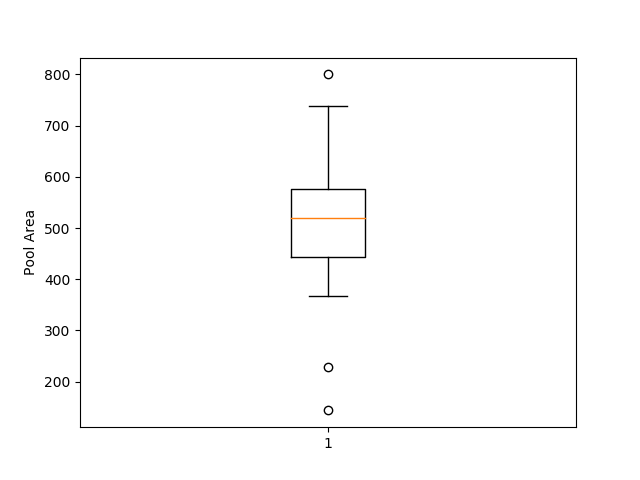

<IPython.core.display.Javascript object>


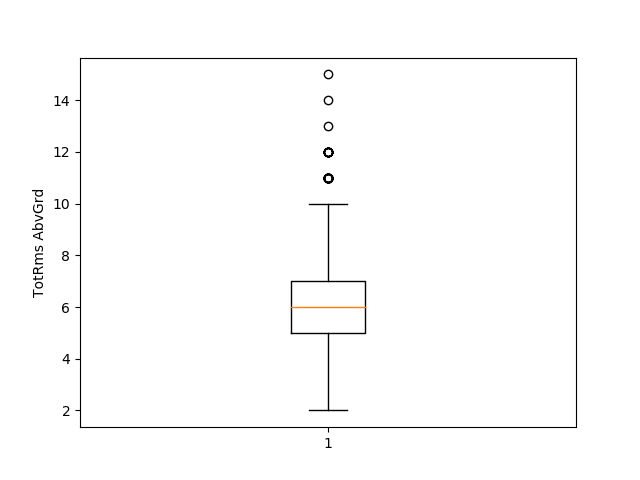

<IPython.core.display.Javascript object>


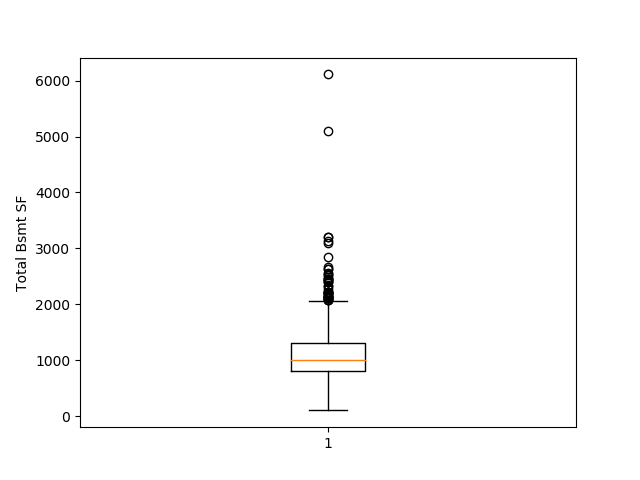

<IPython.core.display.Javascript object>


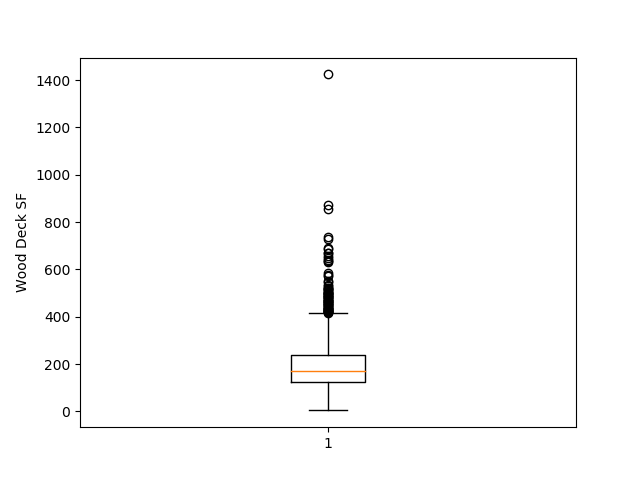

<IPython.core.display.Javascript object>


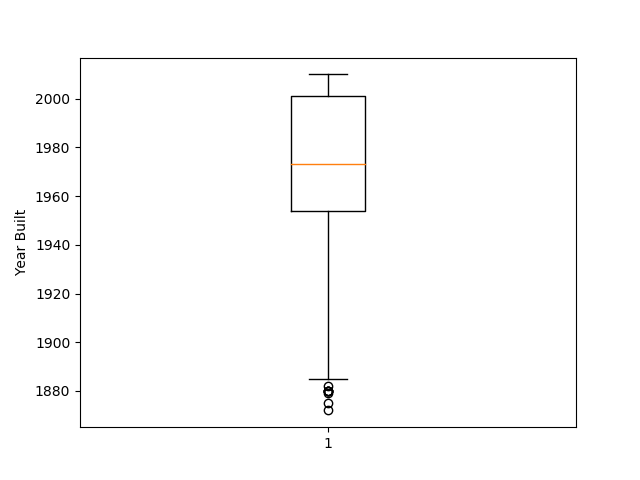

<IPython.core.display.Javascript object>


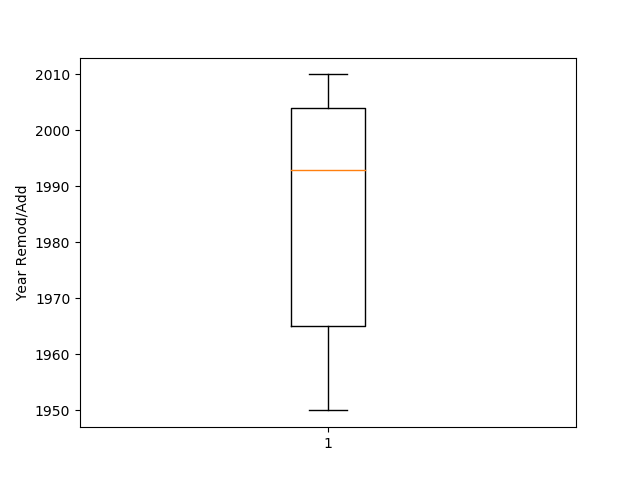

<IPython.core.display.Javascript object>


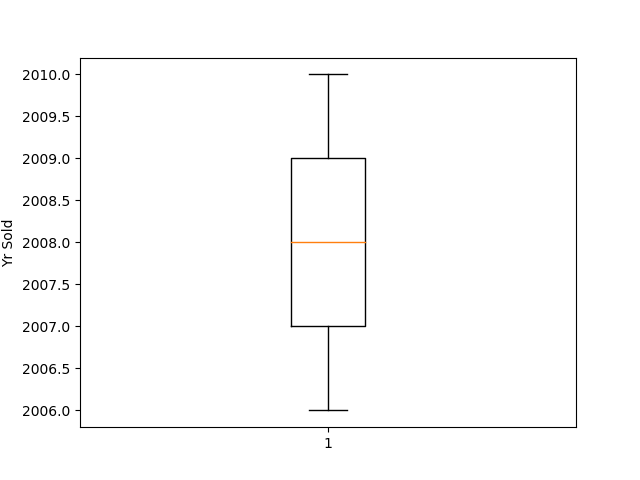

In [47]:
%matplotlib notebook

#create a box plot for each column
for i in range(0, len(columns)):
    plt.figure(i)
    a = X_NN[:,i]
    a.sort()
    plt.boxplot(np.trim_zeros(a))
    plt.ylabel(columns[i])
    plt.show()
    #plt.close()

In [55]:
#calculate the number of 0s in the columns with at least one 0. These 0s are left out of the box chart data
for i in range(0, len(columns)):
    numZeros = 0
    a = X_NN[:,i]
    for j in range(0, len(a)):
        if(a[j]) == 0:
            numZeros = numZeros + 1
    if(numZeros > 0):
        print(columns[i] + ": " + str(numZeros))

2nd Flr SF: 1678
3Ssn Porch: 2893
Bedroom AbvGr: 8
Bsmt Full Bath: 1709
Bsmt Half Bath: 2755
Bsmt Unf SF: 245
BsmtFin SF 1: 931
BsmtFin SF 2: 2579
Enclosed Porch: 2471
Fireplaces: 1422
Full Bath: 12
Garage Area: 158
Garage Cars: 158
Garage Yr Blt: 159
Half Bath: 1843
Kitchen AbvGr: 3
Lot Frontage: 490
Low Qual Fin SF: 2890
Mas Vnr Area: 1771
Open Porch SF: 1300
Pool Area: 2917
Total Bsmt SF: 80
Wood Deck SF: 1526


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


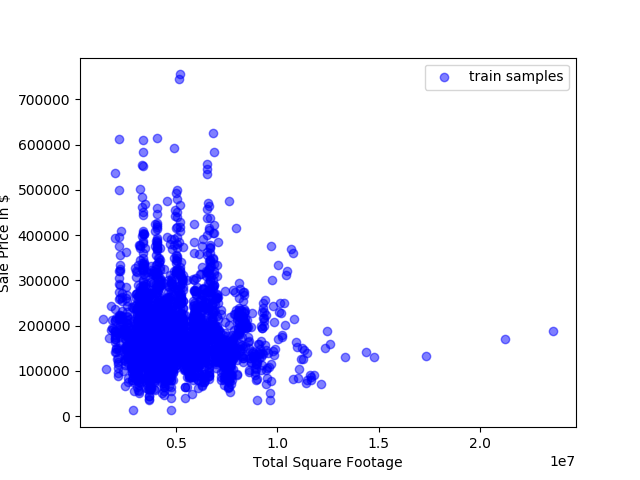

In [101]:
%matplotlib

#Show a plot of the total square footage in a house compared with the price
firstFloorIndex = 0
secondFloorIndex = 0
thirdFloorIndex = 0
basementIndex = 0
sumSquareFootage = []
for i in range(0, len(columns)):
    if("SF" in columns[i]):
        a = X_NN[:, i]
        if(len(sumSquareFootage) > 0):
            for j in range(0, len(a)):
                sumSquareFootage[j] = a[j] + sumSquareFootage[j]
        else:
            sumSquareFootage = a

plt.figure(1)
plt.scatter(sumSquareFootage, Y, color = 'blue', linewidth=1, alpha=.5, label = 'train samples')
plt.xticks()
plt.yticks()
plt.legend()
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price in $')
plt.show()

## Next Up
[Where Do You Go From Here?](07%20-%20From%20Here.ipynb)